In [1]:
# make necessary libraries

import os, sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
from plotly.offline import iplot
import plotly as py

In [3]:
os.getcwd()

'G:\\DataScience Project\\Machine Learning\\parkinson _diesease_detection_by_voicedata'

In [4]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',25)
pd.set_option('display.width',200)

In [5]:
df=pd.read_csv('G:\DataScience Project\All datasets\parkinsons.data')
df.head(5)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ   
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784           0.00007   0.00370   0.00554     0.01109       0.04374             0.426       0.02182       0.03130   0.02971  \
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968           0.00008   0.00465   0.00696     0.01394       0.06134             0.626       0.03134       0.04518   0.04368   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050           0.00009   0.00544   0.00781     0.01633       0.05233             0.482       0.02757       0.03858   0.03590   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997           0.00009   0.00502   0.00698     0.01505       0.05492             0.517       0.02924       0.04005   0.03772   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284           0.00011   0.00655   0.00908     0.01966       0.06425             0.584       0.03490       0.04825   0.04465   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1   spread2        D2       PPE  
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654  
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855  0.368674  
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259  0.332634  
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554  0.368975  
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180  0.410335

In [6]:
df.shape

(195, 24)

In [7]:
#find null value

df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [9]:
for i in df.columns:
        print("*********************************",i,
             "*************************************")
        print()
        print(set(df[i].tolist()))
        print()

********************************* name *************************************

{'phon_R01_S37_4', 'phon_R01_S16_5', 'phon_R01_S19_6', 'phon_R01_S07_2', 'phon_R01_S31_1', 'phon_R01_S49_1', 'phon_R01_S06_4', 'phon_R01_S17_3', 'phon_R01_S19_3', 'phon_R01_S25_1', 'phon_R01_S21_2', 'phon_R01_S43_5', 'phon_R01_S34_5', 'phon_R01_S44_2', 'phon_R01_S10_5', 'phon_R01_S26_3', 'phon_R01_S21_6', 'phon_R01_S02_1', 'phon_R01_S49_4', 'phon_R01_S39_5', 'phon_R01_S06_2', 'phon_R01_S06_6', 'phon_R01_S08_3', 'phon_R01_S13_5', 'phon_R01_S37_5', 'phon_R01_S32_3', 'phon_R01_S42_6', 'phon_R01_S26_5', 'phon_R01_S19_2', 'phon_R01_S19_4', 'phon_R01_S42_4', 'phon_R01_S17_2', 'phon_R01_S04_3', 'phon_R01_S21_1', 'phon_R01_S26_6', 'phon_R01_S10_1', 'phon_R01_S31_5', 'phon_R01_S50_3', 'phon_R01_S08_5', 'phon_R01_S22_4', 'phon_R01_S20_3', 'phon_R01_S49_3', 'phon_R01_S02_6', 'phon_R01_S05_3', 'phon_R01_S21_4', 'phon_R01_S43_6', 'phon_R01_S16_4', 'phon_R01_S43_4', 'phon_R01_S13_2', 'phon_R01_S05_6', 'phon_R01_S37_2', 'ph

In [10]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

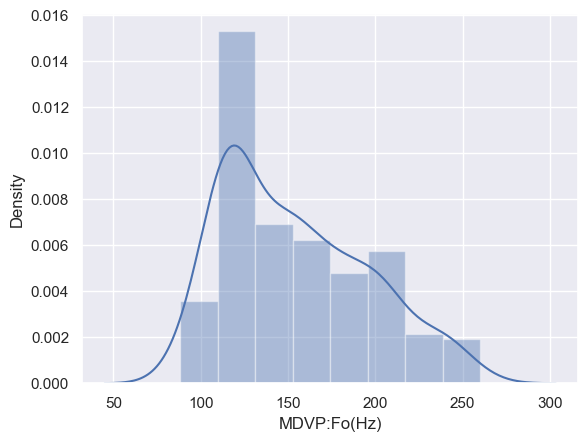

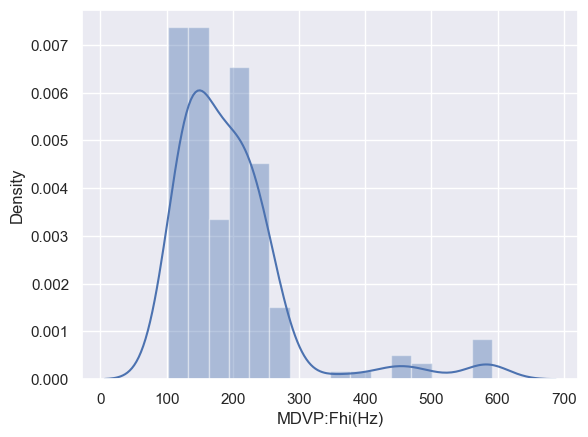

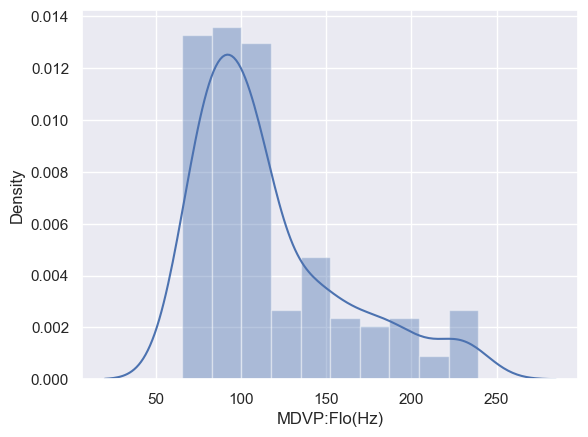

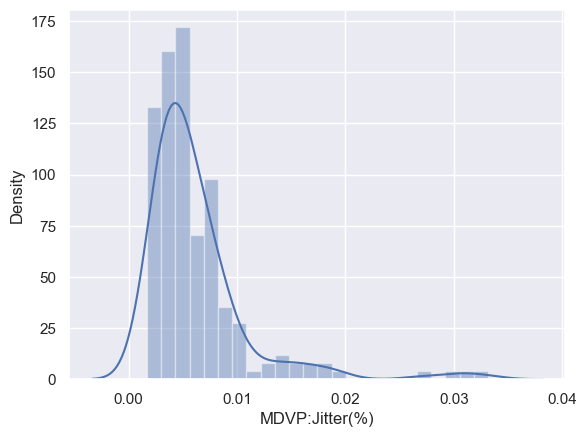

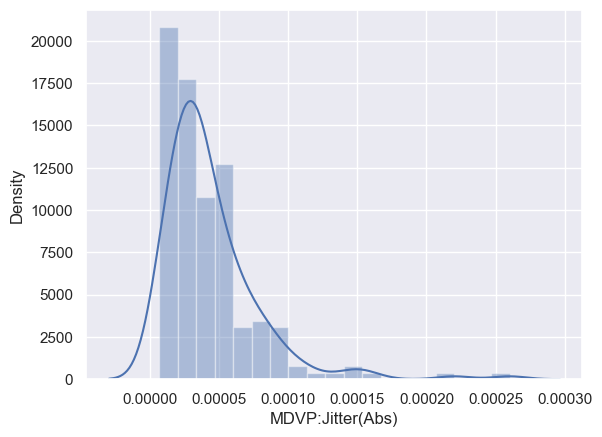

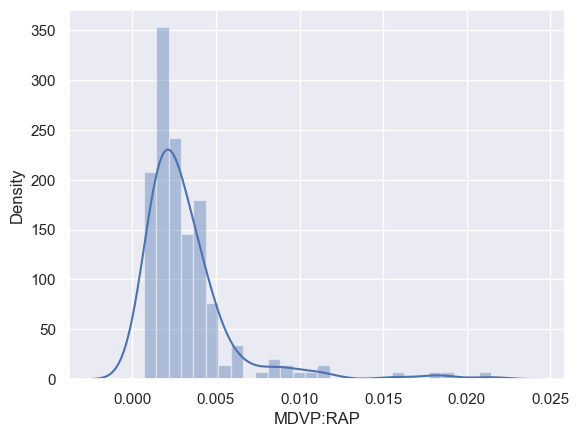

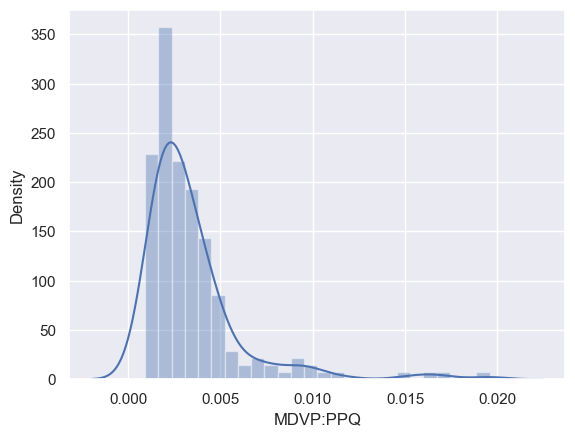

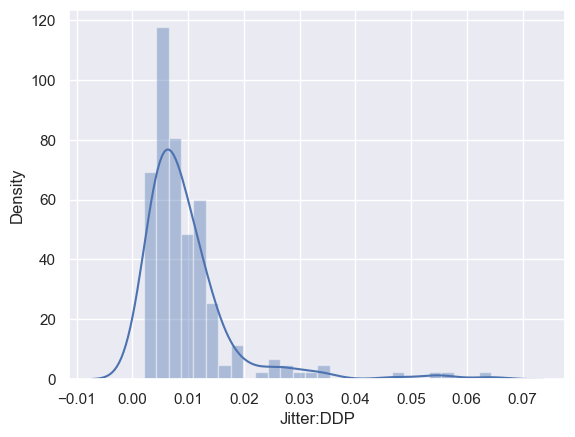

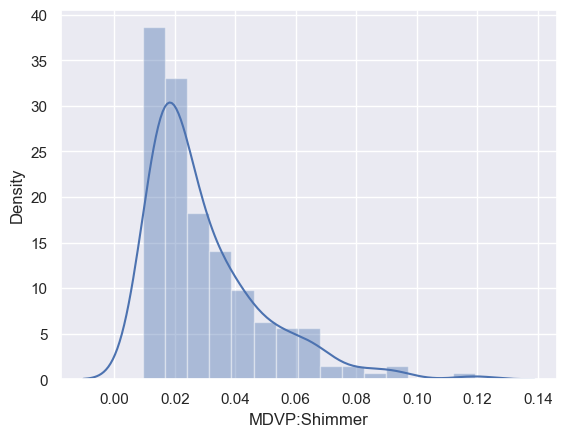

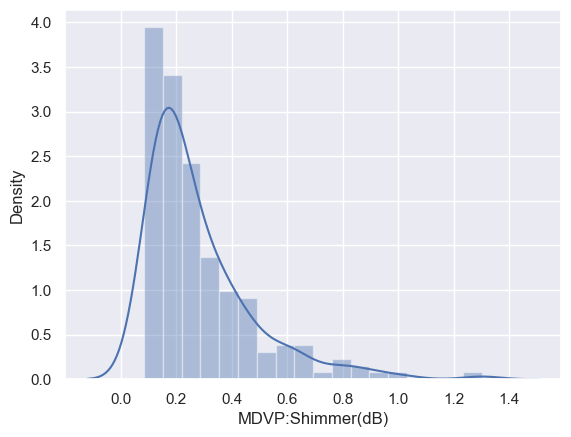

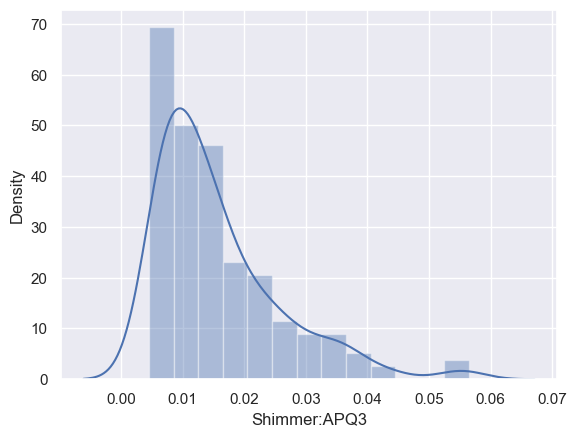

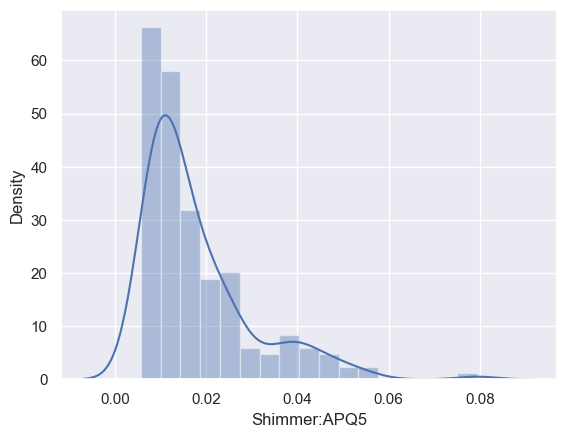

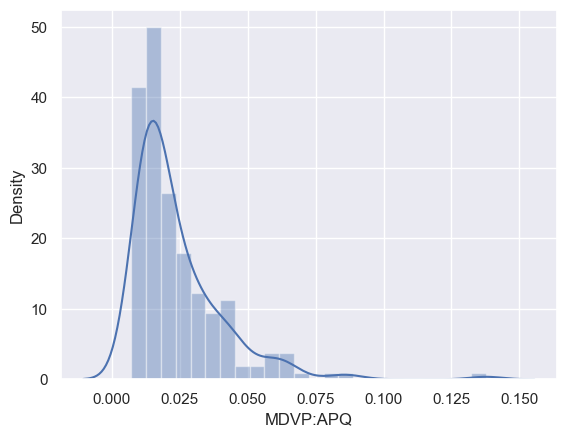

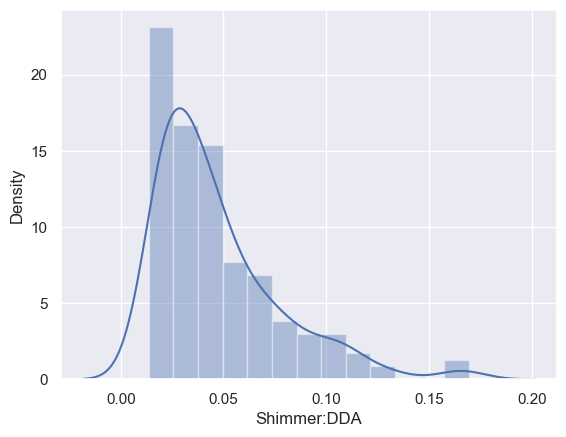

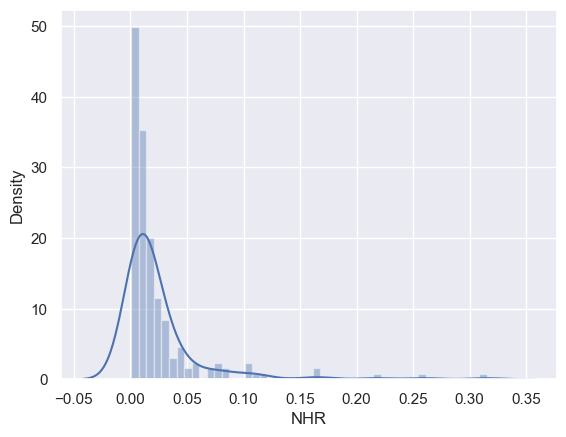

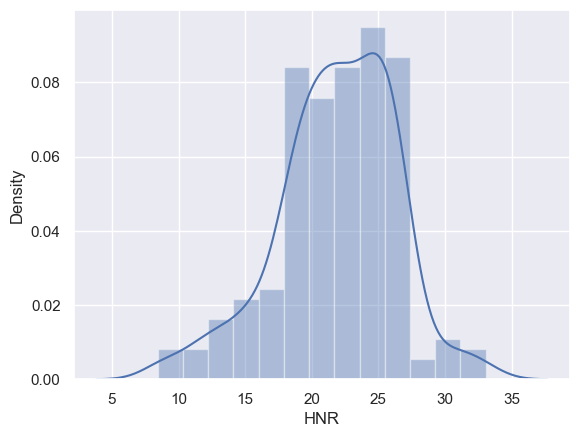

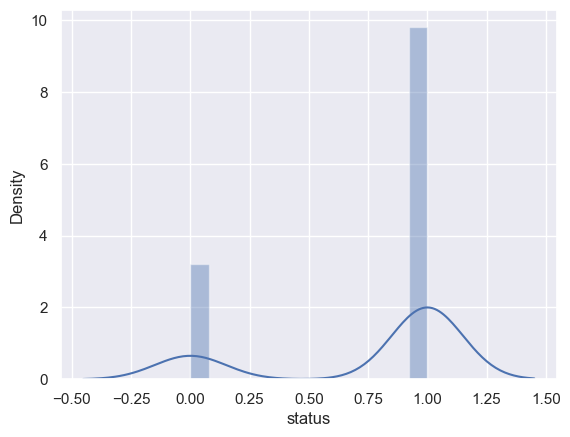

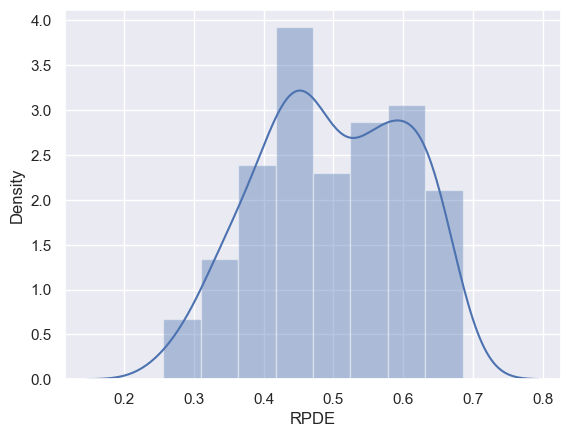

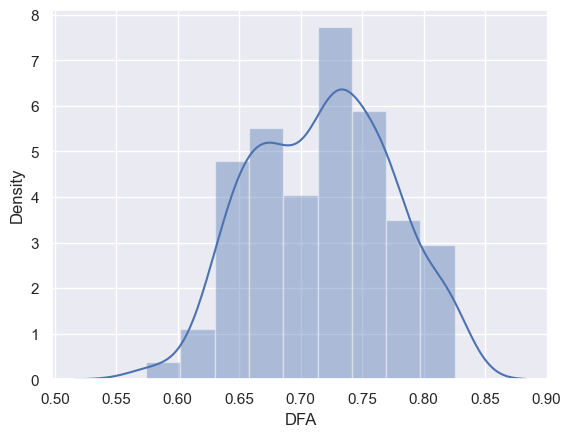

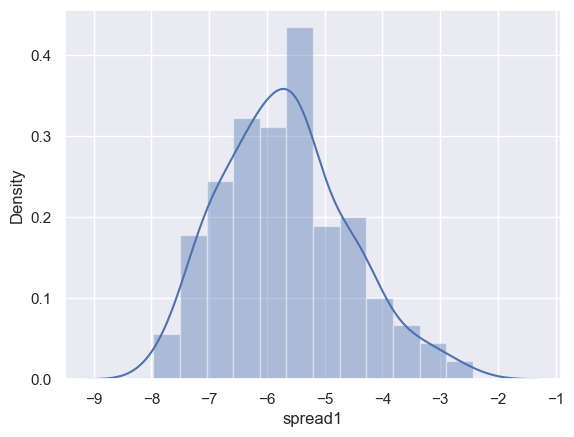

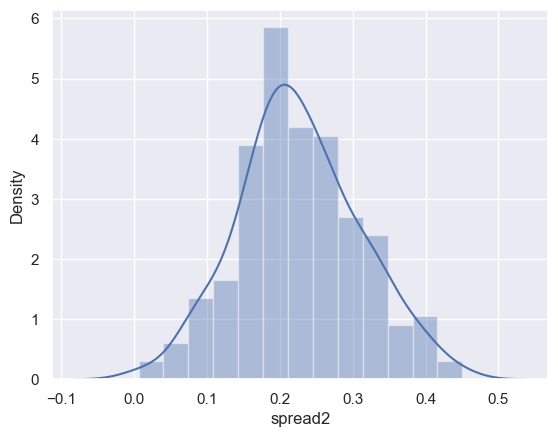

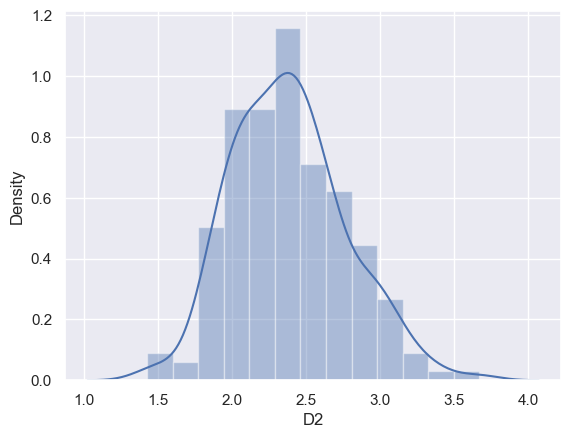

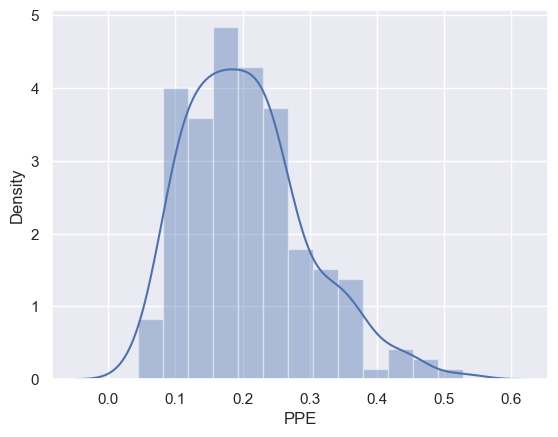

In [12]:
# find the distribution of the dataset

def distplots(col):
    sns.distplot(df[col])
    plt.show()
for i in list(df.columns)[1:]:
    distplots(i)

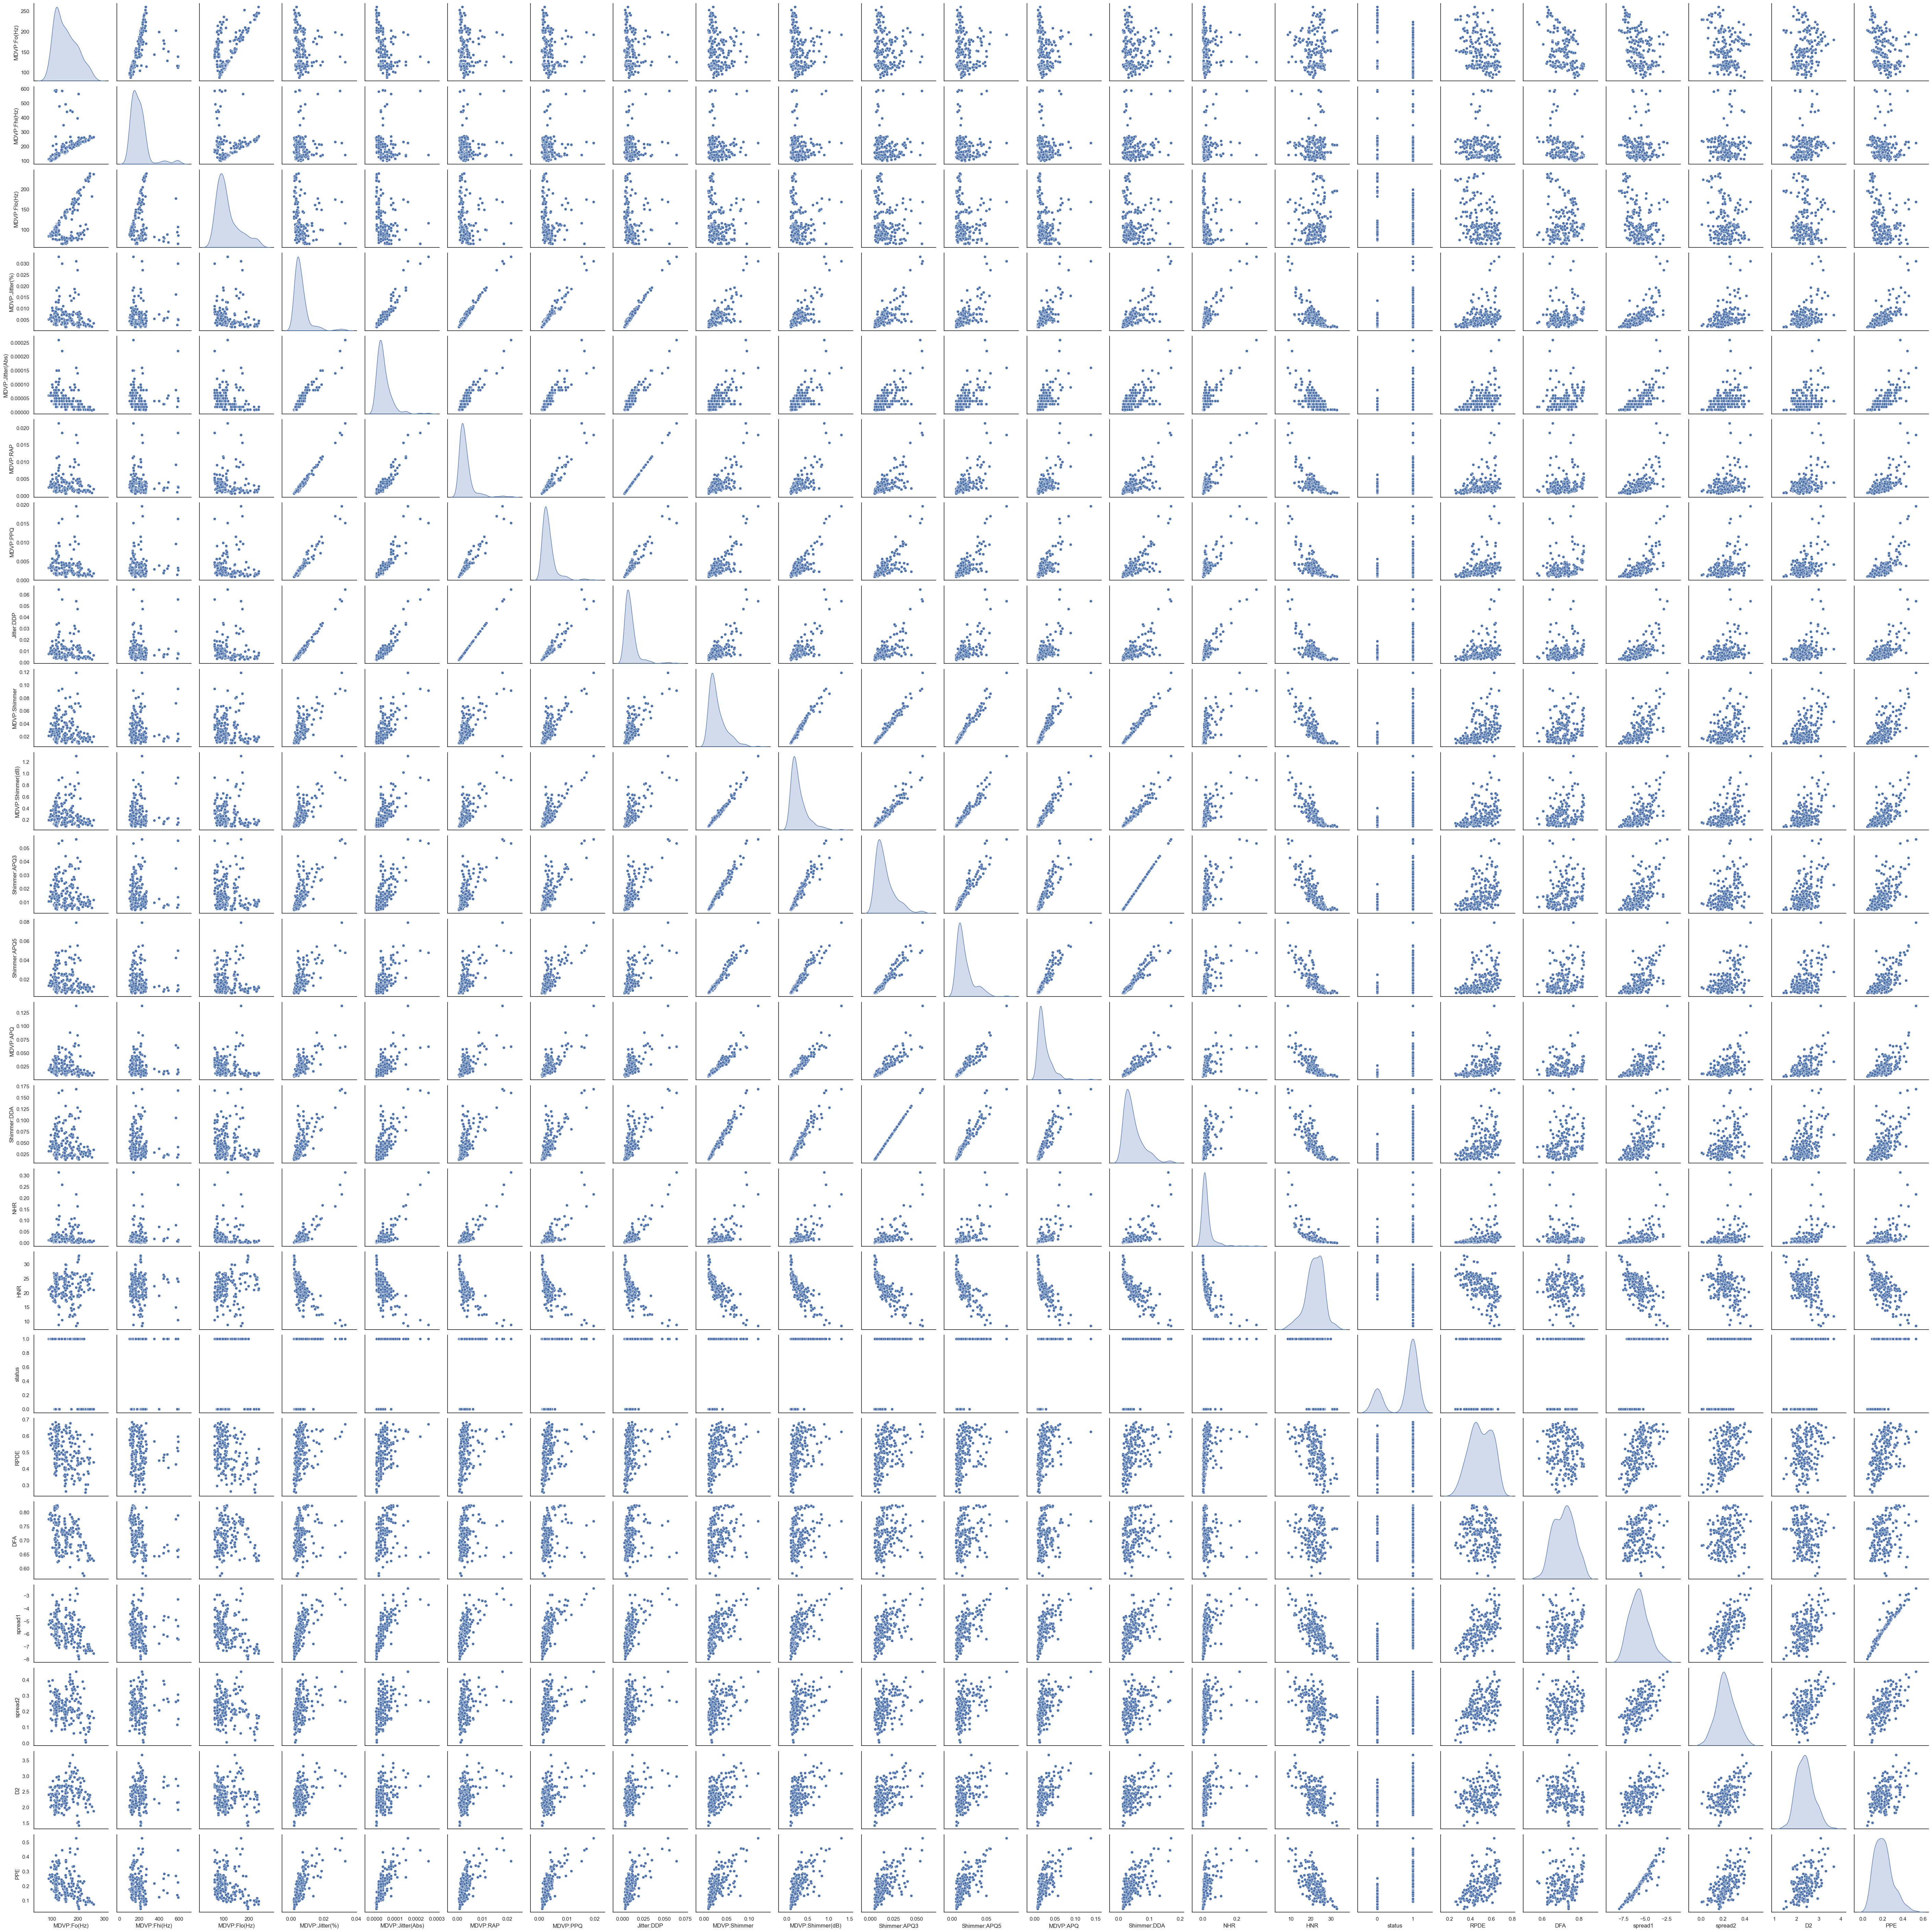

In [13]:
#distribution

# numerical_df = df.select_dtypes(include=['int', 'float']) # Select only numerical columns
# sns.set(style="white")  # Set the style for the pair plot
# sns.pairplot(numerical_df, diag_kind="kde")  # Create a pair plot with kernel density plots on the diagonal
# plt.show()


numerical_columns = df.select_dtypes(include=['int', 'float'])

# Set the style for the pair plot
sns.set(style="white")

# Create a pair plot with kernel density plots on the diagonal for numerical columns
sns.pairplot(numerical_columns, diag_kind="kde")

plt.show()

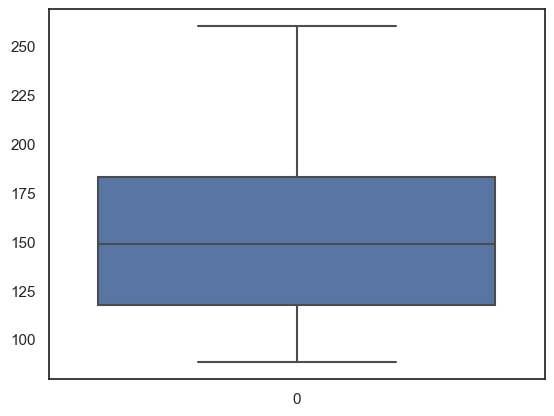

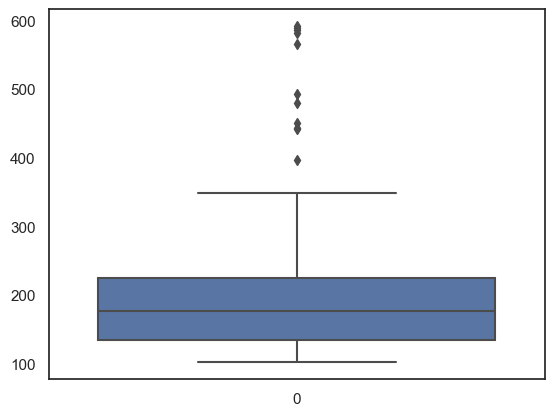

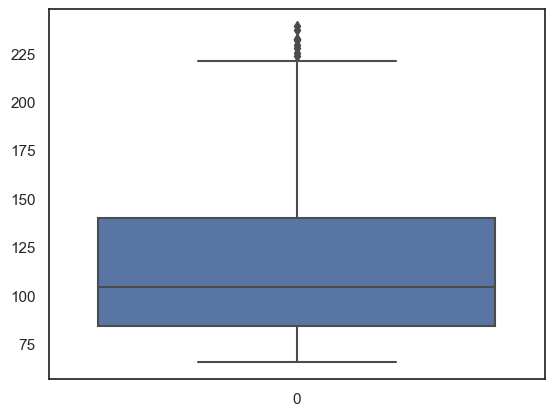

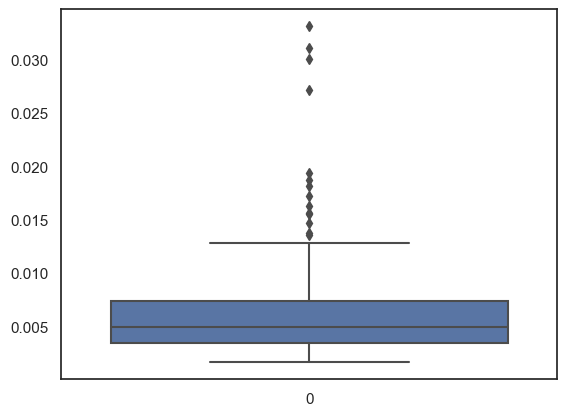

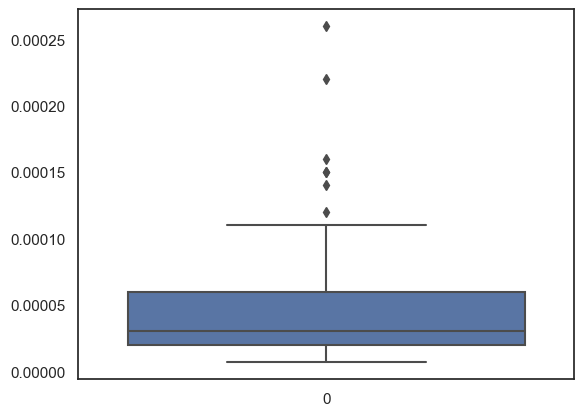

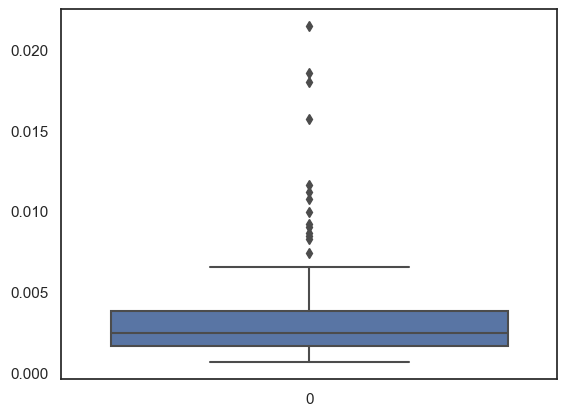

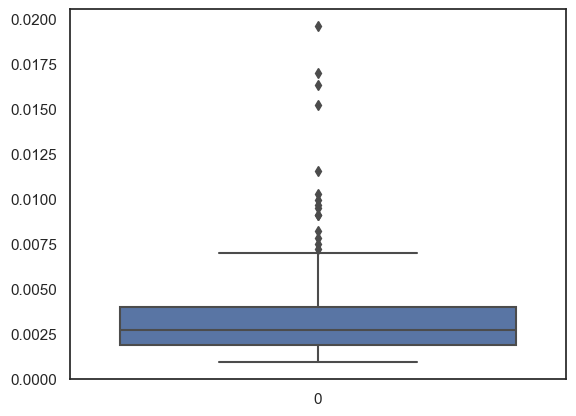

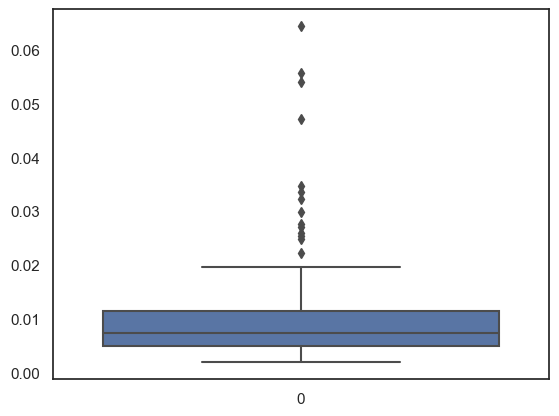

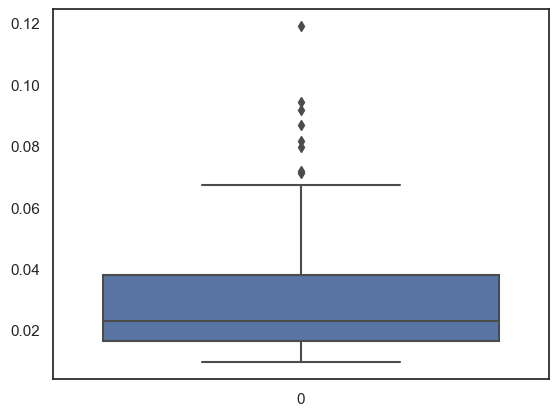

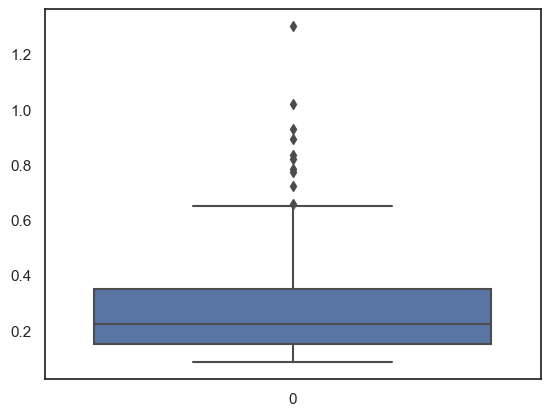

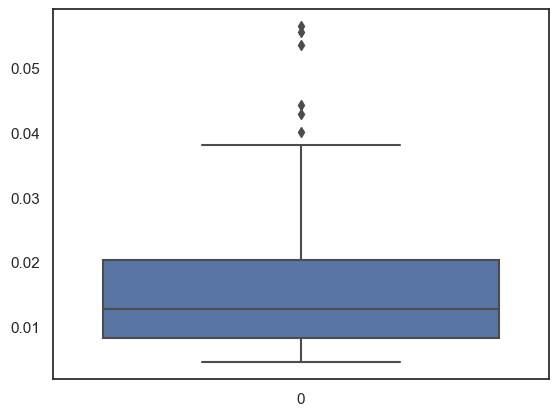

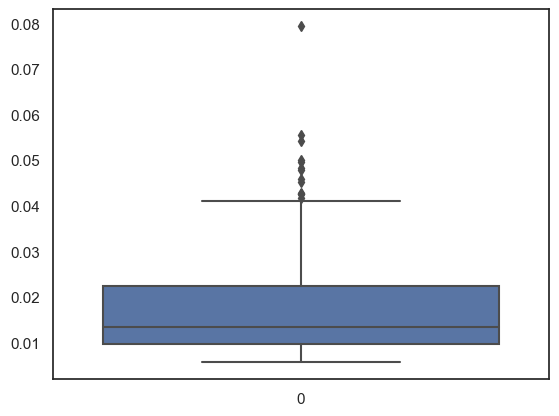

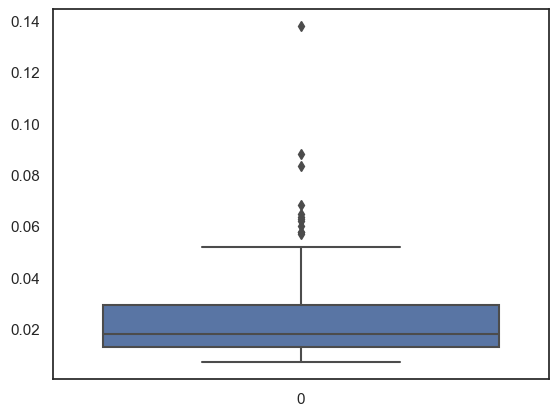

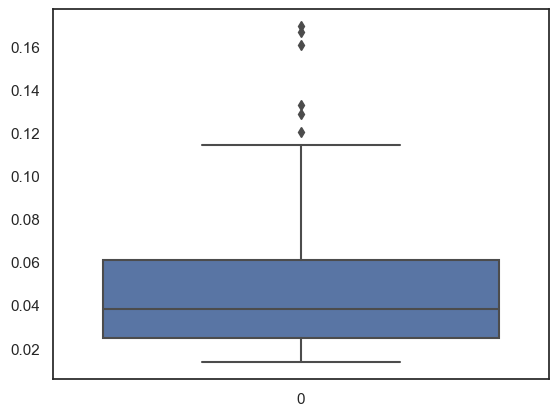

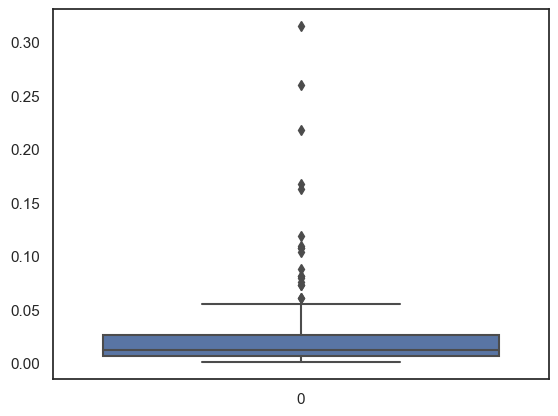

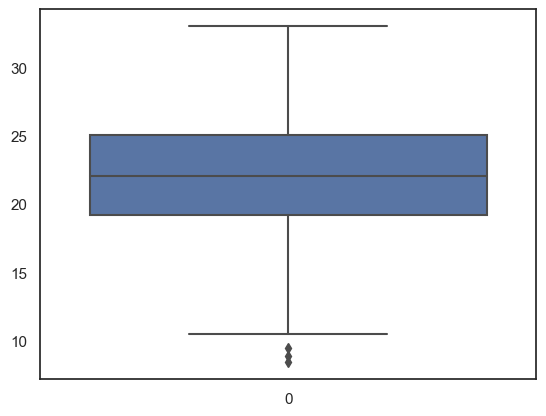

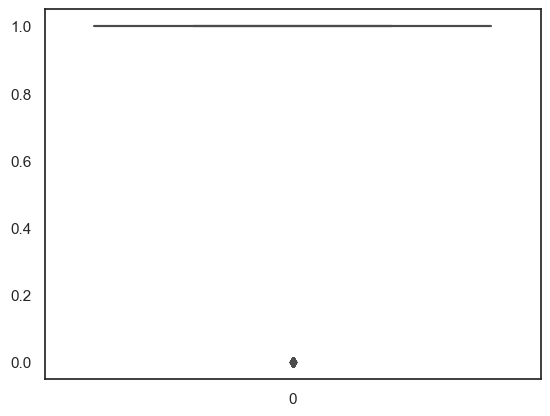

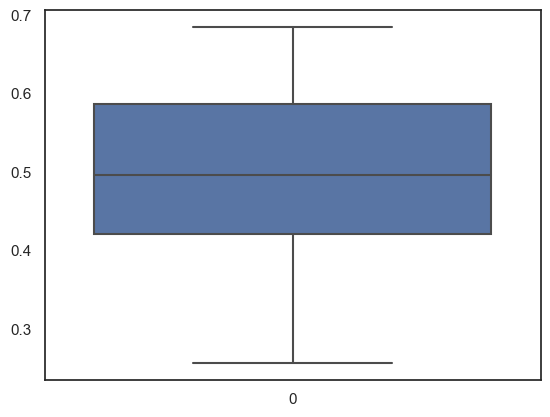

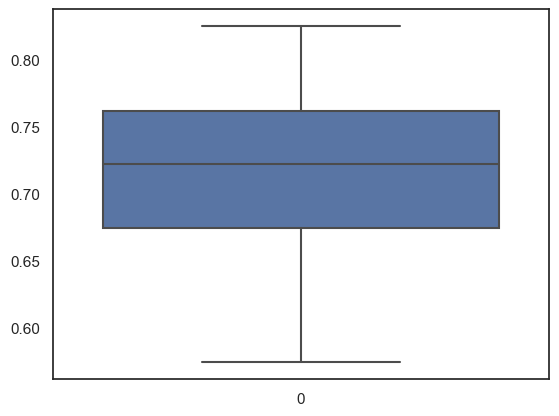

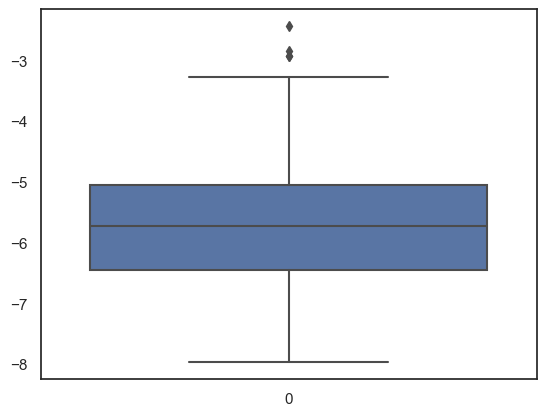

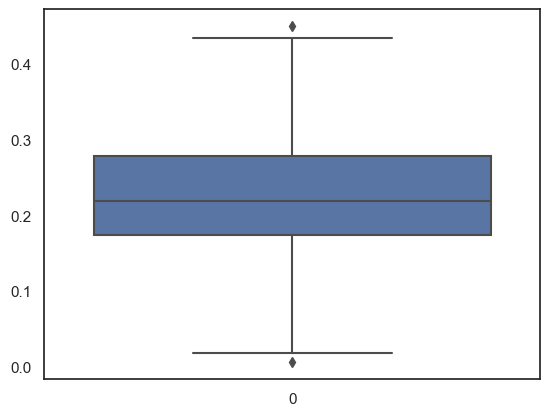

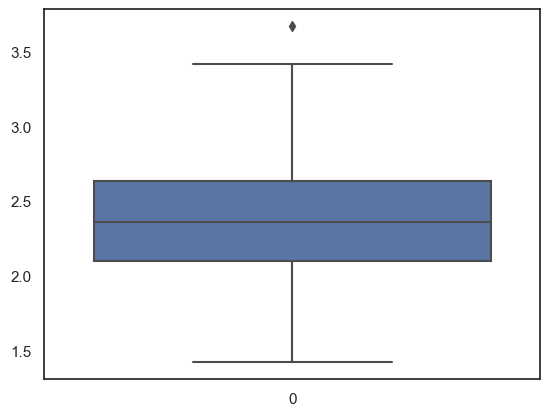

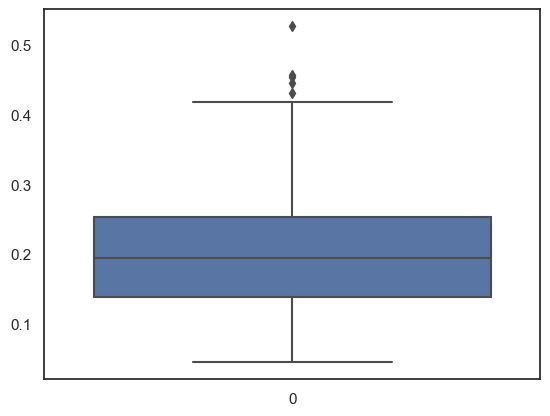

In [14]:
# outlier

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.columns)[1:]:
    boxplots(i)

<Axes: >

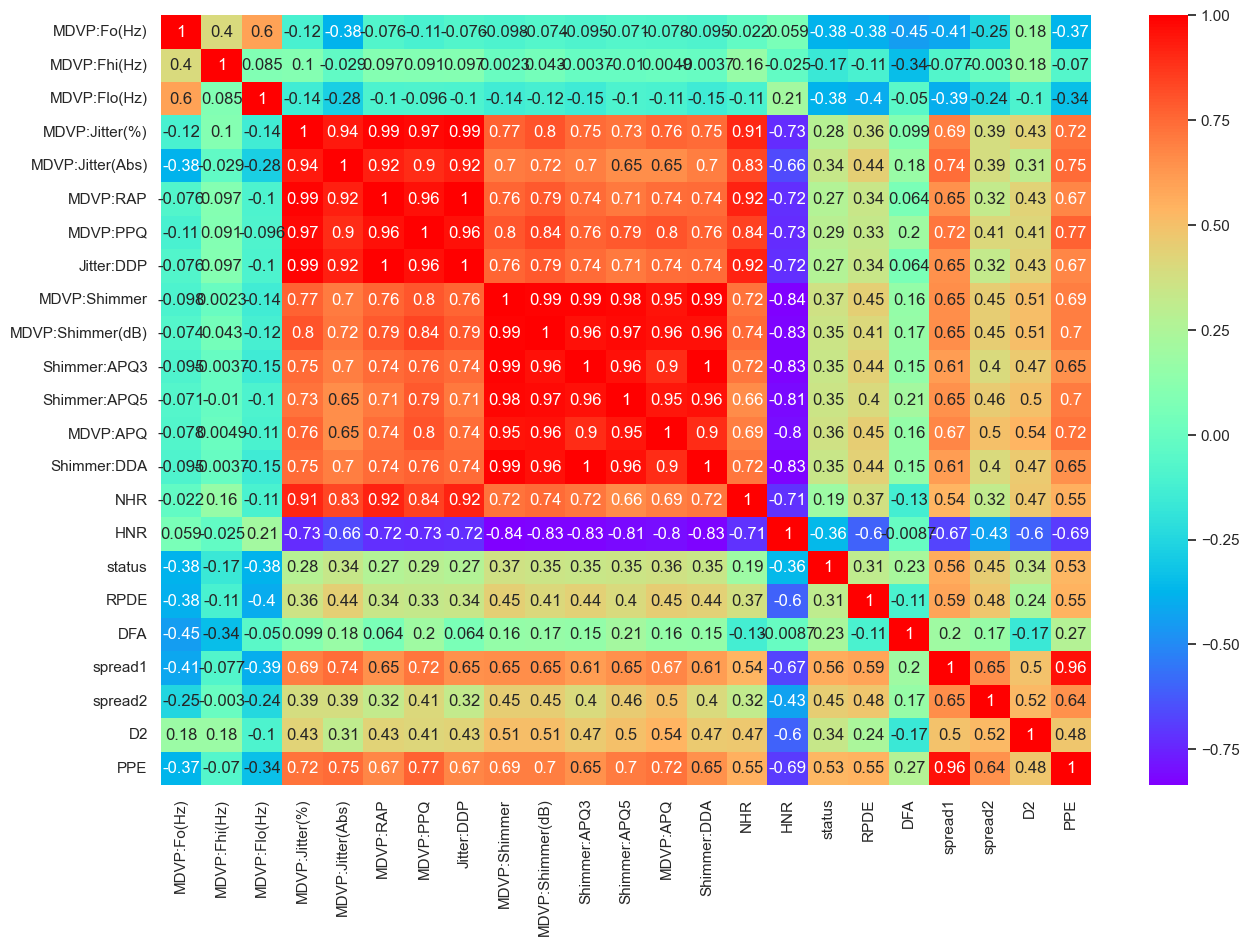

In [15]:
# find correlation
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(15,10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='rainbow')

In [16]:
# make pairplot
# sns.pairplot(df)

In [17]:
# matrics
df[['status','RPDE']].corr()

status      RPDE
status  1.000000  0.308567
RPDE    0.308567  1.000000

In [18]:
# name status drop
x =df.drop(['status','name'],axis=1)
y=df['status']

In [19]:
x.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA   
0      119.992       157.302        74.997         0.00784           0.00007   0.00370   0.00554     0.01109       0.04374             0.426       0.02182       0.03130   0.02971      0.06545  \
1      122.400       148.650       113.819         0.00968           0.00008   0.00465   0.00696     0.01394       0.06134             0.626       0.03134       0.04518   0.04368      0.09403   
2      116.682       131.111       111.555         0.01050           0.00009   0.00544   0.00781     0.01633       0.05233             0.482       0.02757       0.03858   0.03590      0.08270   
3      116.676       137.871       111.366         0.00997           0.00009   0.00502   0.00698     0.01505       0.05492             0.517       0.02924       0.04005   0.03772      0.08771   
4      116.014       141.781       110.655         0.01284           0.00011   0.00655   0.00908     0.01966       0.06425             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR      RPDE       DFA   spread1   spread2        D2       PPE  
0  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654  
1  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590  2.486855  0.368674  
2  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173  2.342259  0.332634  
3  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147  2.405554  0.368975  
4  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513  2.332180  0.410335

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [22]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler
ros = RandomOverSampler()

# Perform random oversampling
x_ros, y_ros = ros.fit_resample(x, y)

# Print the value counts of the original and oversampled data
print(y.value_counts())
print("############")
print(y_ros.value_counts())


status
1    147
0     48
Name: count, dtype: int64
############
status
1    147
0    147
Name: count, dtype: int64


In [23]:
#featuring scaling

from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler((-1,1))
x = scaler.fit_transform(x_ros)
y = y_ros

In [24]:
x.shape

(294, 22)

In [25]:
x=pd.DataFrame(x)
x.head()

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18   
0 -0.631383 -0.774817 -0.890370 -0.608640 -0.501976 -0.709056 -0.504823 -0.709424 -0.375571 -0.439606 -0.334746 -0.305292 -0.655104 -0.334831 -0.863386  0.023490 -0.261689  0.920297  0.139750  \
1 -0.603346 -0.810139 -0.443354 -0.491741 -0.422925 -0.617534 -0.352626 -0.617916 -0.054227 -0.110929  0.031972  0.071370 -0.441152  0.032097 -0.881338 -0.134845 -0.058339  0.954049  0.406554   
2 -0.669923 -0.881744 -0.469423 -0.439644 -0.343874 -0.541426 -0.261522 -0.541178 -0.218733 -0.347576 -0.113251 -0.107734 -0.560303 -0.113365 -0.920807 -0.007559 -0.191168  1.000000  0.273489   
3 -0.669993 -0.854145 -0.471599 -0.473316 -0.343874 -0.581888 -0.350482 -0.582276 -0.171444 -0.290058 -0.048921 -0.067843 -0.532430 -0.049044 -0.918006 -0.008128 -0.167490  0.951770  0.391255   
4 -0.677701 -0.838182 -0.479786 -0.290978 -0.185771 -0.434489 -0.125402 -0.434259 -0.001095 -0.179951  0.169106  0.154681 -0.426296  0.169085 -0.891651 -0.089003 -0.249682  0.985626  0.524944   

         19        20        21  
0  0.171530 -0.218677 -0.005381  
1  0.482674 -0.053710  0.342652  
2  0.372742 -0.182361  0.193365  
3  0.476177 -0.126046  0.343899  
4  0.027597 -0.191329  0.515223

# preprocessing part completed

# Applying PCA for remove the multicollinearlity

In [26]:
#Applying PCA 
from sklearn.decomposition import PCA

In [27]:
pca = PCA(.95)
x_pca =  pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(294, 22)
(294, 8)


In [28]:
pd.DataFrame(x_pca)

0         1         2         3         4         5         6         7
0    1.299579 -0.399023 -0.816547  0.502454 -0.066477 -0.187782  0.158604 -0.012246
1    2.045370  0.222840 -1.077236  0.111815 -0.050601 -0.315394  0.363346  0.196960
2    1.735544  0.012404 -1.160091  0.226045  0.116150 -0.196302  0.133965  0.035626
3    1.876933  0.042322 -1.120094  0.160957  0.070826 -0.324750  0.182350  0.128137
4    2.243336  0.359949 -1.271586  0.453580  0.148853  0.045054  0.096260  0.317679
..        ...       ...       ...       ...       ...       ...       ...       ...
289 -1.196107  0.480389  0.730118 -0.817187 -0.003907  0.096630  0.206940 -0.448911
290  0.483602 -0.729809  0.695602 -0.520658  0.300878  0.221119 -0.218623  0.184592
291 -1.492154  0.868779  0.083913 -0.419014  0.201512  0.033513 -0.150012 -0.018559
292 -1.429341  1.099828 -0.140679  0.070295 -0.060253 -0.066055 -0.177867  0.287652
293 -0.811240  0.067562  0.394405  0.433839 -0.433523  0.171318  0.098727 -0.270799

[294 rows x 8 columns]

In [29]:
pd.DataFrame(x)

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18   
0   -0.631383 -0.774817 -0.890370 -0.608640 -0.501976 -0.709056 -0.504823 -0.709424 -0.375571 -0.439606 -0.334746 -0.305292 -0.655104 -0.334831 -0.863386  0.023490 -0.261689  0.920297  0.139750  \
1   -0.603346 -0.810139 -0.443354 -0.491741 -0.422925 -0.617534 -0.352626 -0.617916 -0.054227 -0.110929  0.031972  0.071370 -0.441152  0.032097 -0.881338 -0.134845 -0.058339  0.954049  0.406554   
2   -0.669923 -0.881744 -0.469423 -0.439644 -0.343874 -0.541426 -0.261522 -0.541178 -0.218733 -0.347576 -0.113251 -0.107734 -0.560303 -0.113365 -0.920807 -0.007559 -0.191168  1.000000  0.273489   
3   -0.669993 -0.854145 -0.471599 -0.473316 -0.343874 -0.581888 -0.350482 -0.582276 -0.171444 -0.290058 -0.048921 -0.067843 -0.532430 -0.049044 -0.918006 -0.008128 -0.167490  0.951770  0.391255   
4   -0.677701 -0.838182 -0.479786 -0.290978 -0.185771 -0.434489 -0.125402 -0.434259 -0.001095 -0.179951  0.169106  0.154681 -0.426296  0.169085 -0.891651 -0.089003 -0.249682  0.985626  0.524944   
..        ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...   
289  0.635878 -0.459163  0.821111 -0.918679 -0.976285 -0.896917 -0.932476 -0.896613 -0.874019 -0.901397 -0.835516 -0.862958 -0.929551 -0.835281 -0.981793  0.424287 -1.000000 -0.131383 -0.739877   
290 -0.522588 -0.845997 -0.388258 -0.795426 -0.739130 -0.906551 -0.902465 -0.906566 -0.718094 -0.764996 -0.637519 -0.823881 -0.811930 -0.637437 -0.973327  0.380801 -0.235556  0.684677 -0.592051   
291  0.410975 -0.384051 -0.723514 -0.748412 -0.818182 -0.746628 -0.785638 -0.746348 -0.671901 -0.707477 -0.557396 -0.705020 -0.822345 -0.557324 -0.888914 -0.129806 -0.182866 -0.131798 -0.360089   
292 -0.685083 -0.914413 -0.503057 -0.895807 -0.818182 -0.911368 -0.885316 -0.911382 -0.899763 -0.914544 -0.862481 -0.901493 -0.936595 -0.862370 -0.978610  0.427619 -0.302718  0.489789 -0.277446   
293 -0.667990 -0.528840 -0.608196 -0.769377 -0.660079 -0.815029 -0.727760 -0.815059 -0.846449 -0.871816 -0.863251 -0.844233 -0.841182 -0.863269 -0.929083  0.108998  0.900560 -0.344765  0.000233   

           19        20        21  
0    0.171530 -0.218677 -0.005381  
1    0.482674 -0.053710  0.342652  
2    0.372742 -0.182361  0.193365  
3    0.476177 -0.126046  0.343899  
4    0.027597 -0.191329  0.515223  
..        ...       ...       ...  
289 -0.944104 -0.043594 -0.797050  
290  0.186766 -0.287830 -0.573546  
291 -0.446089  0.210947 -0.484885  
292 -0.137074 -0.509251 -0.422038  
293 -0.097319 -0.379746 -0.138969  

[294 rows x 22 columns]

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=1)

In [30]:
print(x_test.shape,y_test.shape)

(59, 8) (59,)


# without pca


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [47]:
print(x_test.shape,y_test.shape)

(59, 22) (59,)


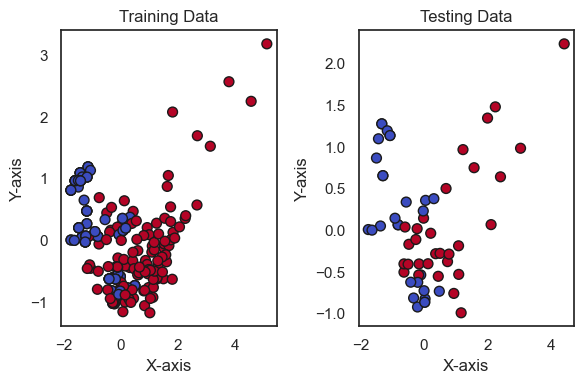

In [31]:
plt.figure(figsize=(6, 4))

# Plot training data points
plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', marker='o', s=50)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Training Data')

# Plot testing data points
plt.subplot(1, 2, 2)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', marker='o', s=50)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Testing Data')

plt.tight_layout()
plt.show()

# model building

In [32]:
from sklearn.metrics import confusion_matrix ,classification_report, accuracy_score

           method used  Accuracy
0  Logistic Regression  0.813559
1         Decison Tree  0.932203
2        Random Forest  0.966102
3                  SVM  0.949153
4                  KNN  0.983051
5           GaussianNB  0.830508
Axes(0.125,0.11;0.775x0.77)


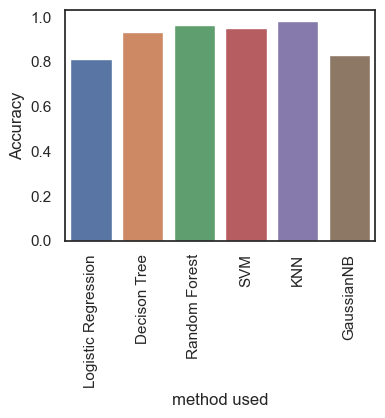

In [33]:
list_met =[]
list_accuracy=[]

#model 1
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr = classifier.fit(x_train,y_train)

#prediction
y_pred= classifier.predict(x_test)

#accuracy
accuracy_LR = accuracy_score(y_test,y_pred)

# model2
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(random_state=14)
dt = classifier2.fit(x_train, y_train)

#prediction
y_pred2 =classifier2.predict(x_test)

#evaluation
accuracy_DT =accuracy_score(y_test, y_pred2)

# model3 
#crieria -gini
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state=14)
rfi = classifier3.fit(x_train, y_train)

#prediction
y_pred3 =classifier3.predict(x_test)

#evaluation
accuracy_RFI =accuracy_score(y_test, y_pred3)

#model 4
from sklearn.svm import SVC

model_svm =SVC()
SVM = model_svm.fit(x_train, y_train)

#prediction
y_pred5 =model_svm.predict(x_test)

#evaluation
accuracy_SVC =accuracy_score(y_test, y_pred5)

#model5
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
knn = model_knn.fit(x_train, y_train)

#prediction
pred_knn =model_knn.predict(x_test)

#evaluation
accuracy_knn =accuracy_score(y_test, pred_knn)

#model6
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)

#prediction
pred_gnb=gnb.predict(x_test)

#evaluation
accuracy_GNB =accuracy_score(y_test, pred_gnb)


list1 = ["Logistic Regression","Decison Tree","Random Forest",
         "SVM","KNN","GaussianNB"]

list2 = [accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_SVC,
        accuracy_knn,accuracy_GNB]

list3 = [classifier,classifier2,classifier3,model_svm,model_knn,
        gnb]

df_accuracy = pd.DataFrame({'method used':list1,"Accuracy":list2})
print(df_accuracy)

plt.figure(figsize=(4, 3))
charts =sns.barplot(x='method used',y ='Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(),rotation=90)
print(charts)

In [38]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
y_pred_xgb = model_xgb.predict(x_test)
print(accuracy_score(y_test, y_pred_xgb))

1.0


In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state=14)
rfi = classifier3.fit(x_train, y_train)

#prediction
y_pred3 =classifier3.predict(x_test)

#evaluation
accuracy_RFI =accuracy_score(y_test, y_pred3)
print(accuracy_score(y_test, y_pred3))

0.9661016949152542


In [35]:
# other evaluation method

from sklearn.metrics import roc_curve, auc

In [36]:
# randomforest entropy
y_pred4_train =classifier3.predict(x_train)
y_pred4_test =classifier3.predict(x_test)

print("***********"*5)
print(y_pred4_train)
print("***********"*5)
print(y_pred4_test)

#knn
pred_knn_train =model_knn.predict(x_train)
pred_knn_test =model_knn.predict(x_test)

print("***********"*5)
print(pred_knn_train)
print("***********"*5)
print(pred_knn_test)

*******************************************************
[0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0
 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1
 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0
 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0
 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0
 0 1 0 0 1 1 1 1 0 0 1 0 1]
*******************************************************
[0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0
 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1]
*******************************************************
[0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0
 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1
 0 1 0 0

# randon forest


In [37]:
#confusion matrix

print(confusion_matrix(y_train,y_pred4_train))
print("***************"*5)
print(confusion_matrix(y_test,y_pred4_test))

[[118   0]
 [  0 117]]
***************************************************************************
[[28  1]
 [ 1 29]]


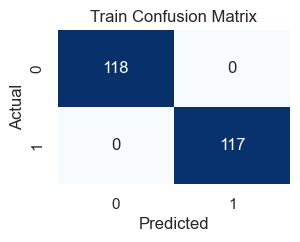

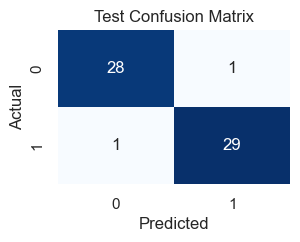

In [38]:
plt.figure(figsize=(3, 2))
sns.heatmap(confusion_matrix(y_train,y_pred4_train), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
 
    
plt.figure(figsize=(3, 2))
sns.heatmap(confusion_matrix(y_test,y_pred4_test), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
 

In [39]:
#evaluation report

print(classification_report(y_train,y_pred4_train))
print("***************"*5)
print(classification_report(y_test,y_pred4_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       117

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235

***************************************************************************
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.97      0.97      0.97        30

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



## knn

[[118   0]
 [  8 109]]
***************************************************************************
[[29  0]
 [ 1 29]]


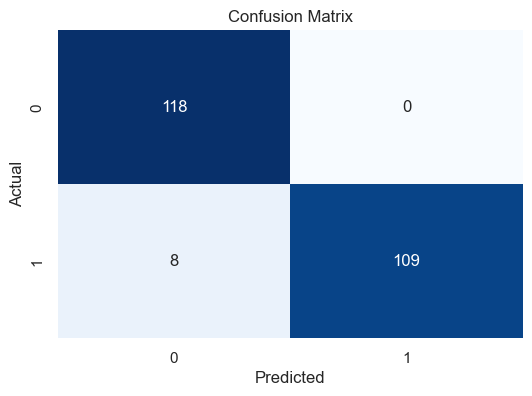

In [40]:
print(confusion_matrix(y_train,pred_knn_train))
print("***************"*5)
print(confusion_matrix(y_test,pred_knn_test))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train,pred_knn_train), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
 

In [41]:

print(classification_report(y_train,pred_knn_train))
print("***************"*5)
print(classification_report(y_test,pred_knn_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       118
           1       1.00      0.93      0.96       117

    accuracy                           0.97       235
   macro avg       0.97      0.97      0.97       235
weighted avg       0.97      0.97      0.97       235

***************************************************************************
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        30

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



In [42]:
def plot_roc(y_probabilities, y_test):
    fpr, tpr, threshold = roc_curve(y_test, y_probabilities)
    roc_auc = auc(fpr, tpr)
    
    plt.title("Receiver Operating Characteristic")
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.show()


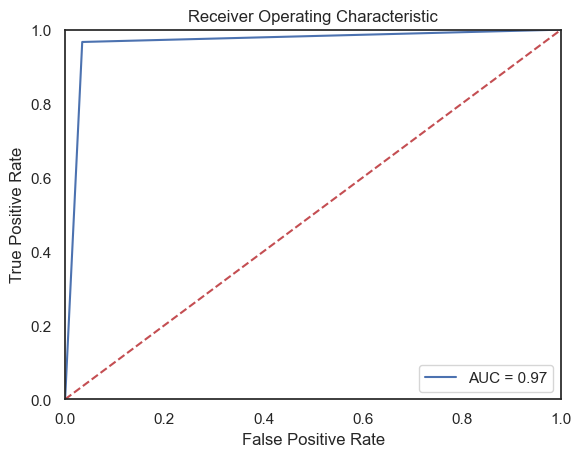

In [43]:
# Assuming y_pred3 contains the predicted probabilities
plot_roc(y_pred3, y_test)


In [39]:
#model save

import joblib
model_filename = 'random_forest_parkinson_model.pkl'
joblib.dump(rfi, model_filename)

print(f'Model saved as {model_filename}')

Model saved as random_forest_parkinson_model.pkl


In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the trained model
model = joblib.load('random_forest_parkinson_model.pkl')  # Replace with your model file

# Load and preprocess your test data
test_data = pd.read_csv("C:\\Users\\meena\\Downloads\\tester.csv")
test_data.drop(["name", "status"], inplace=True, axis = 1)
test_data
prediction = model.predict(test_data)
prediction[0]
print(prediction[0])



In [ ]:

# Calculate and print testing accuracy
accuracy = accuracy_score(test_data, prediction)
print(f"Testing Accuracy: {accuracy * 100:.2f}%")


In [91]:
print(x_test.shape)

(59, 8)


In [ ]:
# voice features extraction


import librosa
import pandas as pd
import numpy as np
from pydub import AudioSegment


# Function to extract voice features
def extract_voice_features(audio_file):
    # Use librosa to extract voice features (example with MFCCs)
    y, sr = librosa.load(audio_file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=8)
    return np.mean(mfccs, axis=1)

if __name__ == "__main__":
    audio_file = "./checking_data/audio (online-audio-converter.com).wav"
    extracted_features = extract_voice_features(audio_file)

    # Dynamically generate columns based on the number of features extracted
    feature_names = [
        "MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)",
        "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP",
        "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5",
        "MDVP:APQ", "Shimmer:DDA", "NHR", "HNR", "status", "RPDE", "DFA",
        "spread1", "spread2", "D2", "PPE"
    ]

    columns = feature_names[:len(extracted_features)]  # Use the specified feature names

    df = pd.DataFrame([extracted_features], columns=columns)
    print(df)

    # Save to Excel
    df.to_excel("parkinson_features1.xlsx", index=False, engine='openpyxl')

In [ ]:
#app.py

import streamlit as st
import numpy as np
import librosa
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification  # For demonstration purposes

# Load the trained model
@st.cache(allow_output_mutation=True)
def load_model():
    # Replace 'RandomForestClassifier()' with the actual instantiation of your model class
    return joblib.load('G:\\DataScience Project\\Machine Learning\\parkinson _diesease_detection_by_voicedata\\random_forest_parkinson_model.pkl')


model = load_model()

# Sample data for demonstration
X, y = make_classification(n_samples=100, n_features=22, n_classes=2, random_state=42)

# Train the model when the app starts
model.fit(X, y)

# Streamlit app
st.title('Parkinson Disease Detection App')

# User input for testing
uploaded_file = st.file_uploader("Upload an audio file", type=["wav", "mp3"])

# Function to extract voice features
def extract_voice_features(audio_file):
    # Use librosa to extract voice features (example with MFCCs)
    y, sr = librosa.load(audio_file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=8)
    return np.mean(mfccs, axis=1)

if uploaded_file is not None:
    # Extract voice features from the uploaded audio file
    voice_features = extract_voice_features(uploaded_file)
    
    # Display the extracted features
    st.write('Extracted Voice Features:')
    st.write(voice_features)

    # Convert the features to a numpy array
    user_input = np.array(voice_features).reshape(1, -1)

    # Make prediction
    if st.button('Predict'):
        prediction = model.predict(user_input)
        st.write('Prediction Result:')
        st.write(f'The predicted class is: {prediction[0]}')


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split your data into x_train, x_test, y_train, y_test

# Model 1: Random Forest
classifier_rf = RandomForestClassifier(random_state=14)
rf_model = classifier_rf.fit(x_train, y_train)
y_pred_rf = classifier_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Model 2: Support Vector Machine (SVM)
classifier_svm = SVC()
svm_model = classifier_svm.fit(x_train, y_train)
y_pred_svm = classifier_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Model 3: k-Nearest Neighbors (KNN)
classifier_knn = KNeighborsClassifier()
knn_model = classifier_knn.fit(x_train, y_train)
y_pred_knn = classifier_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the accuracies
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")


Random Forest Accuracy: 96.61%
SVM Accuracy: 91.53%
KNN Accuracy: 93.22%


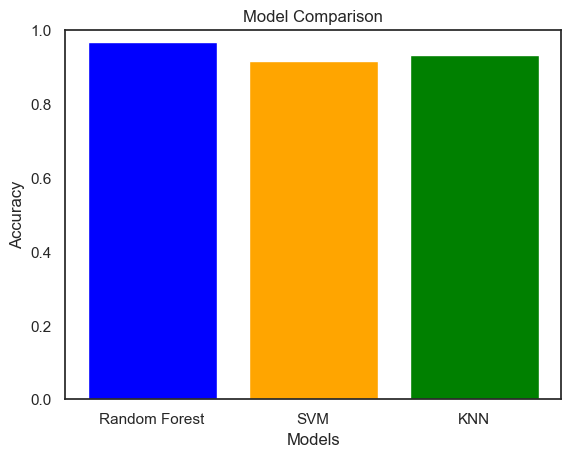

In [83]:
import matplotlib.pyplot as plt

# Model names
models = ['Random Forest', 'SVM', 'KNN']

# Accuracy scores
accuracies = [accuracy_rf, accuracy_svm, accuracy_knn]

# Plotting
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Set the y-axis range to 0-1 for accuracy percentage
plt.show()


In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Model 1: Random Forest
classifier_rf = RandomForestClassifier(random_state=14)
rf_model = classifier_rf.fit(x_train, y_train)
y_pred_rf = classifier_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Model 2: Support Vector Machine (SVM)
classifier_svm = SVC()
svm_model = classifier_svm.fit(x_train, y_train)
y_pred_svm = classifier_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Model 3: k-Nearest Neighbors (KNN)
classifier_knn = KNeighborsClassifier()
knn_model = classifier_knn.fit(x_train, y_train)
y_pred_knn = classifier_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print the metrics
print("Random Forest Metrics:")
print(f"  Accuracy: {accuracy_rf * 100:.2f}%")
print(f"  Precision: {precision_rf:.2f}")
print(f"  Recall: {recall_rf:.2f}")
print(f"  F1 Score: {f1_rf:.2f}")

print("\nSVM Metrics:")
print(f"  Accuracy: {accuracy_svm * 100:.2f}%")
print(f"  Precision: {precision_svm:.2f}")
print(f"  Recall: {recall_svm:.2f}")
print(f"  F1 Score: {f1_svm:.2f}")

print("\nKNN Metrics:")
print(f"  Accuracy: {accuracy_knn * 100:.2f}%")
print(f"  Precision: {precision_knn:.2f}")
print(f"  Recall: {recall_knn:.2f}")
print(f"  F1 Score: {f1_knn:.2f}")


Random Forest Metrics:
  Accuracy: 96.61%
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97

SVM Metrics:
  Accuracy: 91.53%
  Precision: 1.00
  Recall: 0.83
  F1 Score: 0.91

KNN Metrics:
  Accuracy: 93.22%
  Precision: 1.00
  Recall: 0.87
  F1 Score: 0.93


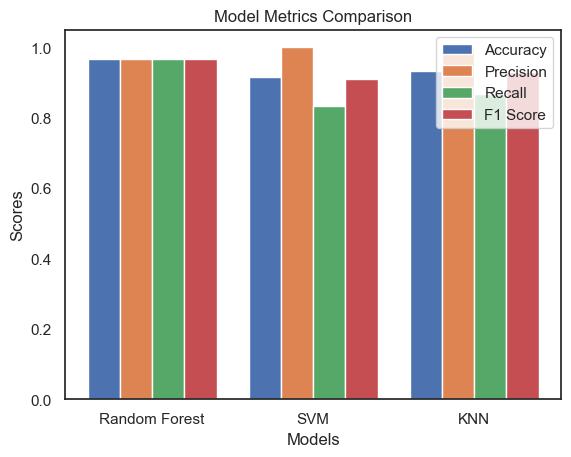

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'SVM', 'KNN']

# Metric values
accuracies = [accuracy_rf, accuracy_svm, accuracy_knn]
precisions = [precision_rf, precision_svm, precision_knn]
recalls = [recall_rf, recall_svm, recall_knn]
f1_scores = [f1_rf, f1_svm, f1_knn]

# Set up the bar positions
bar_width = 0.2
index = np.arange(len(models))

# Plotting
plt.bar(index, accuracies, width=bar_width, label='Accuracy')
plt.bar(index + bar_width, precisions, width=bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recalls, width=bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1_scores, width=bar_width, label='F1 Score')

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Metrics Comparison')
plt.xticks(index + 1.5 * bar_width, models)
plt.legend()

# Show plot
plt.show()
